In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [3]:
df= pd.read_excel('glass.xlsx',sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.isnull().sum()  # no missing values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df.duplicated().sum()  

1

In [9]:
df.drop_duplicates(inplace=True)   # duplicates removed
df.duplicated().sum()  

0

<Axes: >

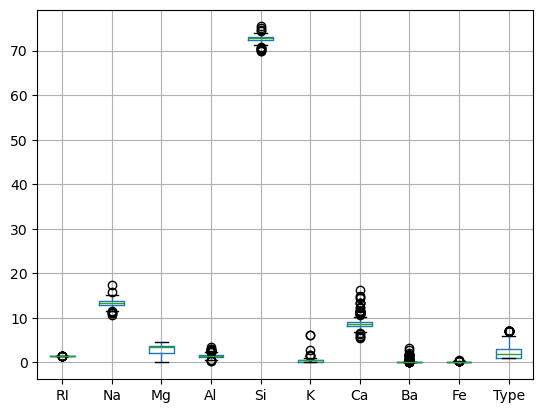

In [10]:
df.boxplot()  # outliers identified

In [11]:
def outliers(df,column):         # outliers removal using IQR method
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

for i in df.select_dtypes(include=['float','int']).columns:
    outliers(df,i)

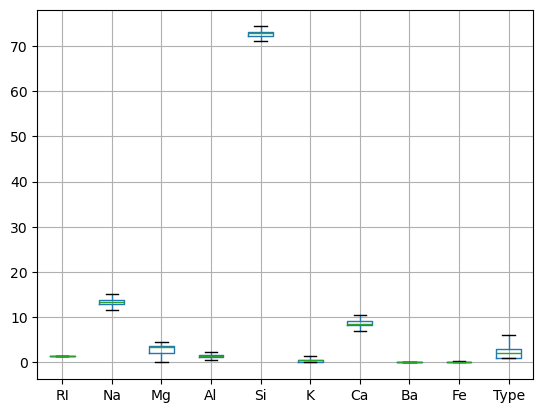

In [12]:
df.boxplot()   # outliers removed
plt.show()

## Visualizations

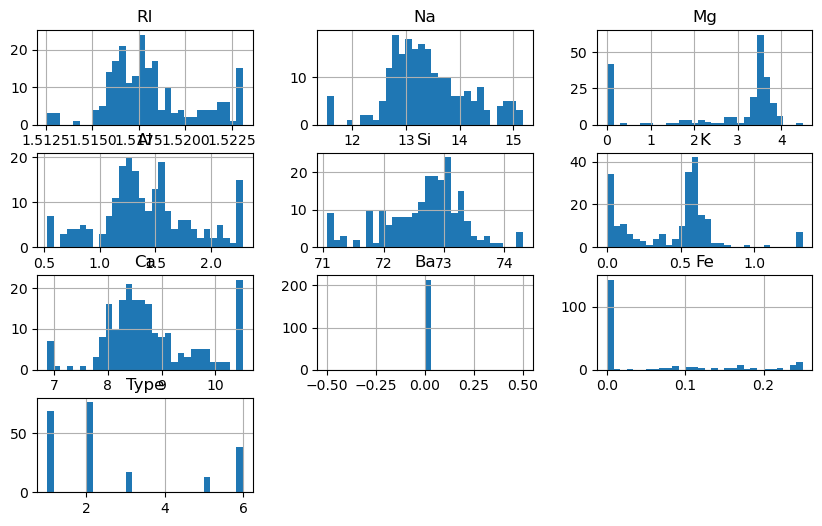

In [14]:
df.hist(figsize=(10,6),bins=30)  # Histogram
plt.show()

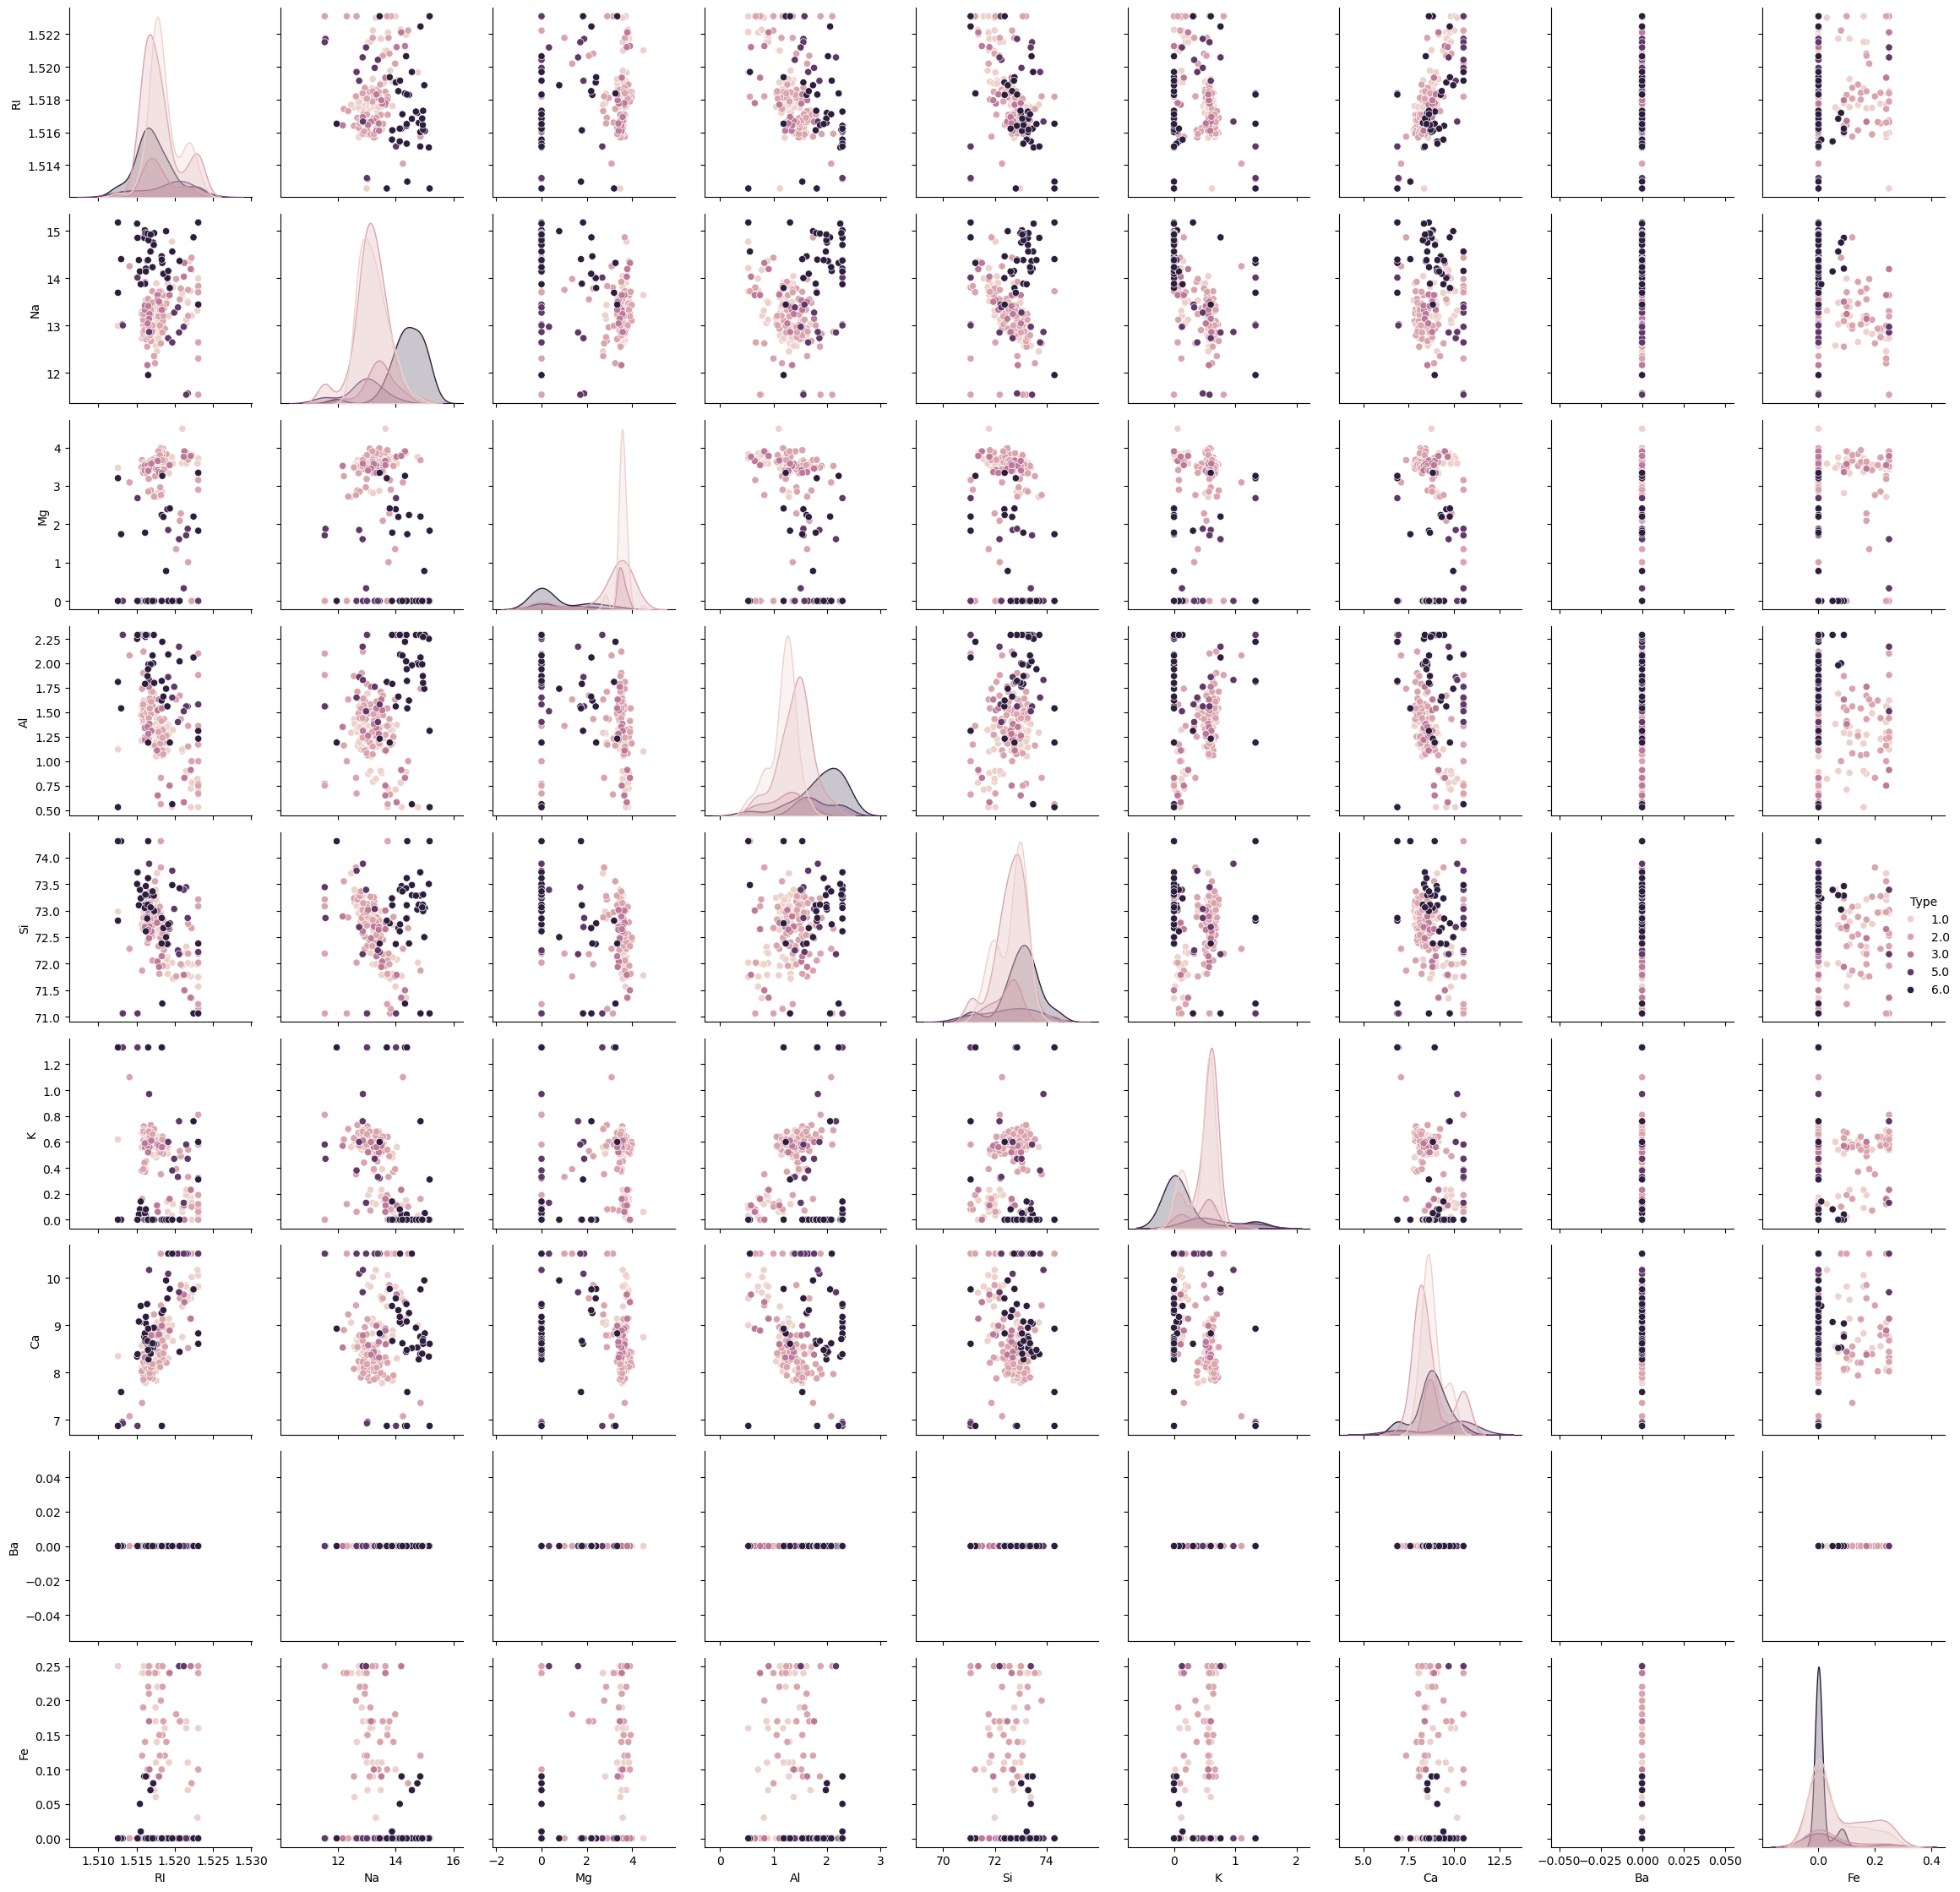

In [15]:
sns.pairplot(df,hue='Type')   # Pairplot
plt.tight_layout()
plt.show()

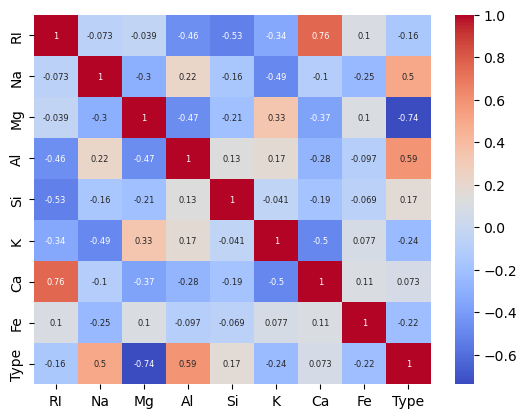

In [16]:
corr=df.loc[:, (df != 0).any(axis=0)].corr()  # correlation
sns.heatmap(corr,annot=True,annot_kws={"size":6},cmap='coolwarm') # correlation heatmap
plt.show()

## Data Preprocessing

In [25]:
x= df.drop(columns=['Type'])  # features
y= df['Type']   # target

In [27]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [29]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Type, dtype: float64

In [31]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type    float64
dtype: object

In [37]:
scaler= StandardScaler()
scaled_x= scaler.fit_transform(x)
scaled_x

array([[ 1.21609303,  0.3226798 ,  1.25723832, ..., -0.04441938,
         0.        , -0.62110164],
       [-0.22720718,  0.6605561 ,  0.63931074, ..., -1.11573287,
         0.        , -0.62110164],
       [-0.83424227,  0.17401423,  0.6045957 , ..., -1.17395642,
         0.        , -0.62110164],
       ...,
       [ 1.06327301,  1.29576355, -1.86017161, ..., -0.40540545,
         0.        , -0.62110164],
       [-0.69415725,  1.32279365, -1.86017161, ..., -0.3588266 ,
         0.        , -0.62110164],
       [-0.43945721,  1.12006787, -1.86017161, ..., -0.19580063,
         0.        , -0.62110164]])

In [41]:
smote= SMOTE(random_state=42)
x_resampled,y_resampled= smote.fit_resample(scaled_x,y)

In [43]:
x_train,x_test,y_train,y_test= train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(304, 9)
(76, 9)
(304,)
(76,)


## Random Forest Model

In [48]:
rf_model= RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [54]:
rf_pred= rf_model.predict(x_test)   # predictions using trained model

In [77]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.79      0.86        19
         2.0       0.81      0.81      0.81        16
         3.0       0.89      1.00      0.94        17
         5.0       1.00      1.00      1.00        13
         6.0       0.92      1.00      0.96        11

    accuracy                           0.91        76
   macro avg       0.91      0.92      0.91        76
weighted avg       0.91      0.91      0.91        76



## Bagging and Boosting methods

In [80]:
bagg_model= BaggingClassifier(n_estimators=100, random_state=42)   # baggingclassifier
bagg_model.fit(x_train,y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [82]:
bagg_pred= bagg_model.predict(x_test)    # making predictions using trained model
print(classification_report(y_test,bagg_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.79      0.86        19
         2.0       0.81      0.81      0.81        16
         3.0       0.89      1.00      0.94        17
         5.0       1.00      1.00      1.00        13
         6.0       0.92      1.00      0.96        11

    accuracy                           0.91        76
   macro avg       0.91      0.92      0.91        76
weighted avg       0.91      0.91      0.91        76



In [84]:
gb_model= GradientBoostingClassifier(n_estimators=100,random_state=42)  # Gradientboostingclassifier
gb_model.fit(x_train,y_train)  

GradientBoostingClassifier(random_state=42)

In [88]:
gb_pred= gb_model.predict(x_test)            # predictions
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.79      0.88        19
         2.0       0.81      0.81      0.81        16
         3.0       0.89      1.00      0.94        17
         5.0       0.93      1.00      0.96        13
         6.0       0.92      1.00      0.96        11

    accuracy                           0.91        76
   macro avg       0.91      0.92      0.91        76
weighted avg       0.91      0.91      0.91        76



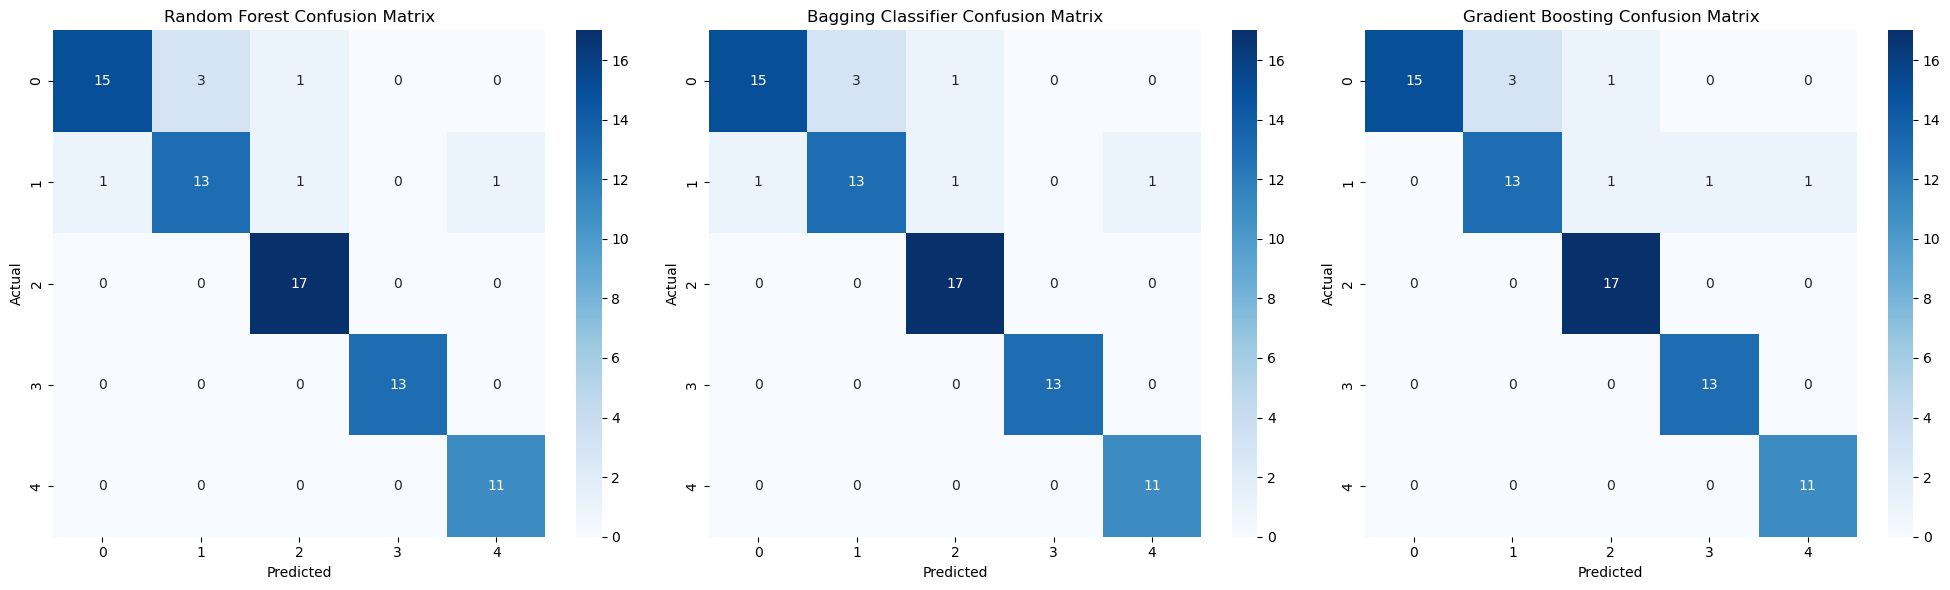

In [100]:
# plotting confusion matrices
fig, axes= plt.subplots(1,3,figsize=(20,6))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='d',cmap='Blues',ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, bagg_pred), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Bagging Classifier Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()